Вариант 1. (простой)

- обучить сверточную нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг  (conv-pool)-(conv-pool)-...) на датасете fashion-mnist
- оценить рост точности при увеличении ширины сети (больше ядер)
- оценить рост точности при увеличении глубины сети (больше слоев)
- сравнить с точностью полносвязной сети для этой выборки
    </li>




1. обучить сверточную нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг  (conv-pool)-(conv-pool)-...) на датасете fashion-mnist

In [28]:
import os

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from __future__ import print_function
#import tensorflow.keras as keras # расскоментируйте эту строку, чтобы начать обучение
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense
from keras.utils import np_utils
from tensorflow.keras.utils import plot_model

In [29]:


classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


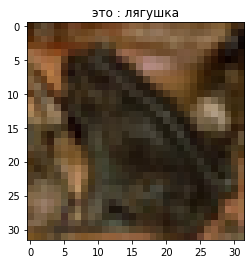

In [30]:
# установка параметров нейросети
batch_size = 1000
num_classes = 10
epochs = 5
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

data_augmentation = False


N = 30

plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[np.argmax(y_test[N,:])])
plt.show()

In [31]:
# конфигурирование слоев нейросети
model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=x_train.shape[1:]),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(.25),

    Conv2D( 64,(3, 3), padding='same', activation='relu'),
    Conv2D( 64,(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='relu')

])

# инициализация RMSprop optimizer
opt = tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

O:\Users\Professional\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [32]:
model.summary()
plot_model(model,'model.png')

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 64)        

In [33]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

Epoch 1/5
50/50 [==============================] - 150s 3s/step - loss: 2.4863 - accuracy: 0.1201 - val_loss: 2.2305 - val_accuracy: 0.1558

In [34]:
# сохранение модели и весов
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('сохранить обученную модель как %s ' % model_path)

# проверка работы обученной модели
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

сохранить обученную модель как O:\Users\Professional\PycharmProjects\Introduction_to_neural_networks\saved_models\keras_cifar10_trained_model.h5 
313/313 [==============================] - 11s 34ms/step - loss: 2.2410 - accuracy: 0.2293

In [35]:
# конфигурирование слоев нейросети
model_2 = Sequential([
    Conv2D(32, (4,4), activation='relu', padding='same', input_shape=x_train.shape[1:]),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(.25),

    Conv2D( 64,(2, 2), padding='same', activation='relu'),
    Conv2D( 64,(2, 2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='relu')

])

# компиляция модели
model_2.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

model_2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

# проверка работы обученной модели
scores = model_2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/5
50/50 [==============================] - 130s 3s/step - loss: 2.8023 - accuracy: 0.1027 - val_loss: 2.2893 - val_accuracy: 0.1375

Вывод, при уменьшении размеров фильтра на каждом последующем слое точность падает

2. оценить рост точности при увеличении ширины сети (больше ядер)



In [36]:
# конфигурирование слоев нейросети
model_3 = Sequential([
    Conv2D(32, (2, 2), activation='relu', padding='same', input_shape=x_train.shape[1:]),
    Conv2D(32, (2, 2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(.25),

    Conv2D( 64,(3, 3), padding='same', activation='relu'),
    Conv2D( 64,(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='relu')

])

# компиляция модели
model_3.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

model_3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

# проверка работы обученной модели
scores = model_3.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])



Epoch 1/5
50/50 [==============================] - 123s 2s/step - loss: 2.6650 - accuracy: 0.1005 - val_loss: 2.2966 - val_accuracy: 0.1230

При увеличении размера фильтра с каждым новым слоем точность падает


3. оценить рост точности при увеличении глубины сети (больше слоев)


In [37]:
# конфигурирование слоев нейросети
model_4 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]),
    Conv2D(32, (2, 2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(.25),

    Conv2D( 64,(3, 3), padding='same', activation='relu'),
    Conv2D( 64,(2, 2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D( 64,(3, 3), padding='same', activation='relu'),
    Conv2D( 64,(2, 2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D( 64,(3, 3), padding='same', activation='relu'),
    Conv2D( 64,(2, 2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='relu')

])

# компиляция модели
model_4.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
model_4.summary()
model_4.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

# проверка работы обученной модели
scores = model_4.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])



Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 31, 31, 32)        4128      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 14, 14, 64)        16448     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 64)        

При увеличении количества слоёв точность падает

4. сравнить с точностью полносвязной сети для этой выборки

In [38]:
# конфигурирование слоев нейросети
model_5 = Sequential([
    Dense(1024*3, activation='relu', input_shape=x_train.shape[1:]),
    Dense(2048, activation='relu'),
    Dense(2048, activation='tanh'),
    Dense(num_classes, activation='relu',)

])

# компиляция модели
model_5.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

model_5.summary()

model_5.fit(x_train, y_train,
          batch_size=100,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)

# проверка работы обученной модели
scores = model_5.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 32, 32, 3072)      12288     
_________________________________________________________________
dense_69 (Dense)             (None, 32, 32, 2048)      6293504   
_________________________________________________________________
dense_70 (Dense)             (None, 32, 32, 2048)      4196352   
_________________________________________________________________
dense_71 (Dense)             (None, 32, 32, 10)        20490     
Total params: 10,522,634
Trainable params: 10,522,634
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5


ValueError: in user code:

    O:\Users\Professional\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    O:\Users\Professional\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    O:\Users\Professional\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    O:\Users\Professional\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    O:\Users\Professional\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    O:\Users\Professional\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    O:\Users\Professional\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:796 train_step
        loss = self.compiled_loss(
    O:\Users\Professional\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    O:\Users\Professional\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\losses.py:155 __call__
        losses = call_fn(y_true, y_pred)
    O:\Users\Professional\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\losses.py:259 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    O:\Users\Professional\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    O:\Users\Professional\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\losses.py:1643 categorical_crossentropy
        return backend.categorical_crossentropy(
    O:\Users\Professional\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    O:\Users\Professional\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\backend.py:4862 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    O:\Users\Professional\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (100, 10) and (100, 32, 32, 10) are incompatible
